In [1]:
specprod = 'iron'    # Internal name for the EDR
specprod_dir = '/global/cfs/cdirs/desi/public/dr1/spectro/redux/iron'
print(specprod_dir)
import os

/global/cfs/cdirs/desi/public/dr1/spectro/redux/iron


In [3]:
from desitarget.targetmask import desi_mask, bgs_mask, scnd_mask

print(desi_mask)

desi_mask:
  - [LRG,              0, "LRG", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3200, 'MORE_ZGOOD': 2, 'MORE_ZWARN': 2, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_MIDZQSO': 0}, 'numobs': 2}]
  - [ELG,              1, "ELG", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3000, 'MORE_ZGOOD': 2, 'MORE_ZWARN': 2, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_MIDZQSO': 0}, 'numobs': 2}]
  - [QSO,              2, "QSO", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3400, 'MORE_ZGOOD': 3350, 'MORE_ZWARN': 3300, 'MORE_MIDZQSO': 100, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 4}]
  - [QSO_HIZ,          4, "QSO selected using high-redshift Random Forest (informational bit)", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 0, 'DONE': 0, 'OBS': 0, 'DONOTOBSERVE': 0, 'MORE_MIDZQSO': 0, 'MORE_ZWARN': 0, 'MORE_ZGOOD': 0}, 'numobs': -1}]
  - [ELG_LOP,          5, "ELG at standard (ELG) priority", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3100, 'MORE_ZGOOD': 2,

In [4]:
!ls '/global/cfs/cdirs/desi/public/dr1/spectro/redux/iron/zcatalog/v1/zall-pix-iron.fits'

/global/cfs/cdirs/desi/public/dr1/spectro/redux/iron/zcatalog/v1/zall-pix-iron.fits


In [5]:
!ls '/global/cfs/cdirs/desi/spectro/redux/kibo/zcatalog/v1'

logs				  zpix-sv3-bright.fits
redux_kibo_zcatalog_v1.sha256sum  zpix-sv3-dark.fits
zall-pix-kibo.fits		  ztile-cmx-other-cumulative.fits
zall-tilecumulative-kibo.fits	  ztile-main-backup-cumulative.fits
zpix-cmx-other.fits		  ztile-main-bright-cumulative.fits
zpix-main-backup.fits		  ztile-main-dark-cumulative.fits
zpix-main-bright.fits		  ztile-special-backup-cumulative.fits
zpix-main-dark.fits		  ztile-special-bright-cumulative.fits
zpix-special-backup.fits	  ztile-special-dark-cumulative.fits
zpix-special-bright.fits	  ztile-sv1-backup-cumulative.fits
zpix-special-dark.fits		  ztile-sv1-bright-cumulative.fits
zpix-sv1-backup.fits		  ztile-sv1-dark-cumulative.fits
zpix-sv1-bright.fits		  ztile-sv1-other-cumulative.fits
zpix-sv1-dark.fits		  ztile-sv2-backup-cumulative.fits
zpix-sv1-other.fits		  ztile-sv2-bright-cumulative.fits
zpix-sv2-backup.fits		  ztile-sv2-dark-cumulative.fits
zpix-sv2-bright.fits		  ztile-sv3-backup-cumulative.fits
zpix-sv2-dark.fits		  ztile-sv3-bright-cumula

In [6]:
from astropy.table import Table
zpix_cat = Table.read(f'/global/cfs/cdirs/desi/spectro/redux/kibo/zcatalog/v1/zall-pix-kibo.fits', hdu="ZCATALOG")

KeyboardInterrupt: 

In [1]:
from astropy.table import Table
zpix_cat = Table.read('/global/cfs/cdirs/desi/public/dr1/spectro/redux/iron/zcatalog/v1/zall-pix-iron.fits', hdu="ZCATALOG")

## LAE Spectra

In [7]:
elg_tgtmask = desi_mask['ELG']

In [8]:
desi_target = zpix_cat["DESI_TARGET"]
is_elg = (desi_target & elg_tgtmask != 0) | (zpix_cat["SV1_DESI_TARGET"] & elg_tgtmask != 0) | \
         (zpix_cat["SV2_DESI_TARGET"] & elg_tgtmask != 0) | (zpix_cat["SV3_DESI_TARGET"] & elg_tgtmask != 0)

In [11]:
import numpy as np
n_elg  = np.count_nonzero(is_elg)
print(n_elg)

6287115


In [83]:
selected_data = zpix_cat[is_elg & (zpix_cat['Z'] >= 2) & (zpix_cat['SPECTYPE'] == 'GALAXY')]

In [84]:
selected_data

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_PSF_TO_FIBER_SPECFLUX,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MIN_MJD,MAX_MJD,MEAN_MJD,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,MAIN_NSPEC,MAIN_PRIMARY,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,DESINAME
,,,,,,,,,,,,,,,,deg,deg,mas / yr,mas / yr,yr,,,,,,,,,,,mag,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,,,arcsec,,,,,mag,mag,mag,mas,,,,,,,,,,,,,,,,,,,,,deg,deg,,s,,,mm,mm,mm,mm,,deg,arcsec,deg,arcsec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float32,float64,float32,float64,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool,int16,bool,int16,bool,bytes22


In [78]:
np.where(selected_data['TARGETID'] == 39628433239576872)[0]

array([286649, 298644])

In [79]:
selected_data[286649]

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_PSF_TO_FIBER_SPECFLUX,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MIN_MJD,MAX_MJD,MEAN_MJD,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,MAIN_NSPEC,MAIN_PRIMARY,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,DESINAME
,,,,,,,,,,,,,,,,deg,deg,mas / yr,mas / yr,yr,,,,,,,,,,,mag,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,,,arcsec,,,,,mag,mag,mag,mas,,,,,,,,,,,,,,,,,,,,,deg,deg,,s,,,mm,mm,mm,mm,,deg,arcsec,deg,arcsec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float32,float64,float32,float64,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool,int16,bool,int16,bool,bytes22
39628433239576872,sv1,dark,28151,28151,2.6238780501924004,8.70535300410055e-05,0,13584.082849264145,0.3459885278006901 .. 0.0,7929,QSO,HIZ,4,11163.912127081305,0,192.9406354285804,27.778370208224715,0.0,0.0,2021.0116,9292797400071942,1,TGT,0.15506873821318956,3,9010,1928p277,484985,4392,PSF,0.010448934,1.094509,1.1625563,1.8625927,5.2353,7.5507083,1040.4863,415.23413,109.52422,3.996055,0.84777665,0.85077983,0.9036741,1.4478239,0.85077983,0.9036741,1.4478239,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,S,3400,4,0,0,0,0,0,9292797400071942,0,0,0,0,0,0,0,0,0,0,0,192.9406354285804,27.778370208224715,8,7012.359,5,1,-0.000375,0.009117291,-0.000125,0.0057336725,0.789,192.9406336987738,0.13385573,27.77837071417851,0.08305031,59223.50557523,59254.46296906,59230.387358692504,937.9454,0.71603596,172.53009,464.14658,3759.4656,1210.2034,19.172575,7.9970436,54195.848,108.97568,9712.169,0.3136651,11119.751,63825.336,35.06009,159.15341,0.000106823616,414.85263,1.9754369e-05,0.0,18507.346,0.0001407208,87.64756,192.6942,55133.793,524.5443,9

In [80]:
import desispec.io

def get_spec_data(tid, survey=None, program=None):
    #-- the index of the specific target can be uniquely determined with the combination of TARGETID, SURVEY, and PROGRAM
    idx = np.where( (selected_data["TARGETID"]==tid) & (selected_data["SURVEY"]==survey) & (selected_data["PROGRAM"]==program) )[0][0]

    #-- healpix values are integers but are converted here into a string for easier access to the file path
    hpx = selected_data["HEALPIX"].astype(str)

    if "sv" in survey:
        specprod = "iron"

    specprod_dir = f"/global/cfs/cdirs/desi/spectro/redux/{specprod}"
    target_dir   = f"{specprod_dir}/healpix/{survey}/{program}/{hpx[idx][:-2]}/{hpx[idx]}"
    coadd_fname  = f"coadd-{survey}-{program}-{hpx[idx]}.fits"

    #-- read in the spectra with desispec
    coadd_obj  = desispec.io.read_spectra(f"{target_dir}/{coadd_fname}")
    coadd_tgts = coadd_obj.target_ids().data

    #-- select the spectrum of  targetid
    row = ( coadd_tgts==selected_data["TARGETID"][idx] )
    coadd_spec = coadd_obj[row]

    return coadd_spec

In [81]:
spec_dark = get_spec_data(39628433239576872, 'sv3', 'dark')

#-- get the BRIGHT TIME spectrum
spec_bright = get_spec_data(39628433239576872, survey="sv1", program="dark")
tid = 39628433239576872

INFO:spectra.py:391:read_spectra: iotime 1.343 sec to read coadd-sv3-dark-28151.fits at 2024-12-11T09:09:29.944065
INFO:spectra.py:391:read_spectra: iotime 0.894 sec to read coadd-sv1-dark-28151.fits at 2024-12-11T09:09:31.404392


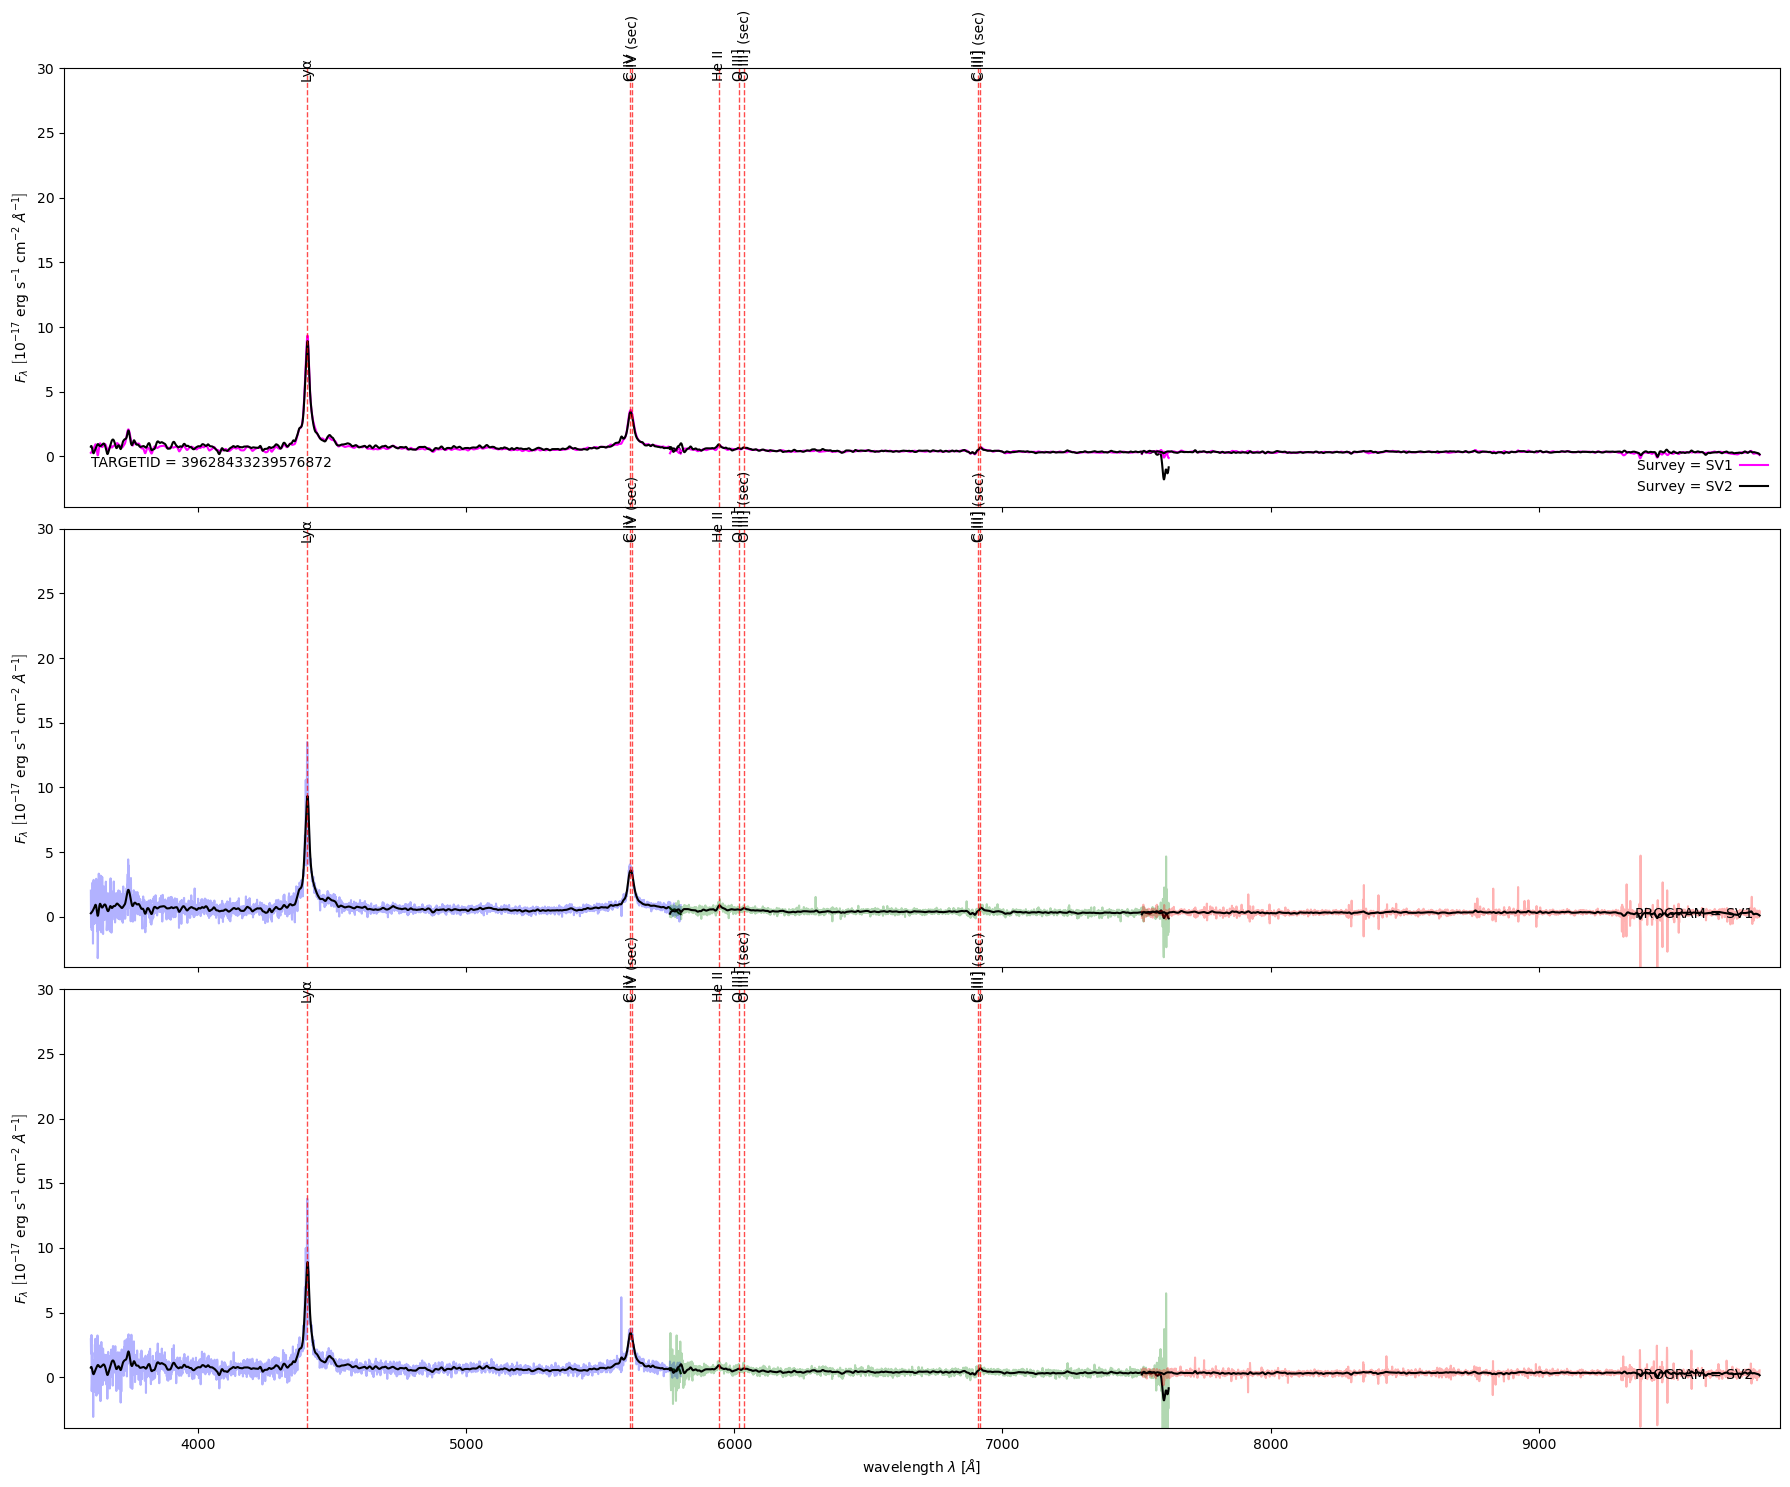

In [82]:
# Define rest-frame wavelengths of common emission lines (in Angstroms)
emission_lines = {
    "Lyα": 1215.67,        # Lyman-alpha
    "C IV": 1548.20,       # Carbon IV doublet (primary)
    "C IV (sec)": 1550.77, # Carbon IV doublet (secondary)
    "He II": 1640.42,      # Helium II
    "O III]": 1660.81,     # Oxygen [O III]
    "O III] (sec)": 1666.15,
    "C III]": 1906.68,     # Carbon [C III] doublet (primary)
    "C III] (sec)": 1908.73, # Carbon [C III] doublet (secondary)
}


# Redshift factor
z = 2.6238780501924004

# Redshifted wavelengths
redshifted_lines = {name: rest * (1 + z) for name, rest in emission_lines.items()}

#-- plot the spectra
fig, axes = plt.subplots(3, 1, figsize=(18, 15), sharex=True, sharey=True)

for ax in axes:
    ax.set_xlim(3500, 9900)
    ax.set_ylim(-3.9, 30)  #-- change depending on specific spectrum
    ax.set_ylabel(r"$F_{\lambda}\ \left[ 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right]$")

axes[-1].set_xlabel(r"wavelength $\lambda\ \left[ \AA \right]$")

#-- plot the BRIGHT TIME and DARK TIME spectra (both smoothed) on the same axis
for band in ("b", "r", "z"):
    if band == "z":
        label_bright = "Survey = SV1"
        label_dark = "Survey = SV2"
    else:
        label_bright = label_dark = ""
    axes[0].plot(spec_bright.wave[band], convolve(spec_bright.flux[band][0], Gaussian1DKernel(5)), color="magenta", label=label_bright)
    axes[0].plot(spec_dark.wave[band], convolve(spec_dark.flux[band][0], Gaussian1DKernel(5)), color="k", label=label_dark)

axes[0].legend(markerfirst=False, loc=4, handletextpad=0.5, frameon=False)
axes[0].text(3600, 0, f"TARGETID = {tid}", ha="left", va="top")

#-- plot the BRIGHT TIME and DARK TIME spectra at full resolution on separate axes
for ax, coadd_spec, prog in zip(axes[1:], (spec_bright, spec_dark), ("SV1", "SV2")):
    ax.text(9800, 2, f"\nPROGRAM = {prog.upper()}", ha="right", va="top")
    for band, color in zip(("b", "r", "z"), ("b", "g", "r")):
        #-- plot the spectrum from each arm (B, R, Z) in blue, green, red
        ax.plot(coadd_spec.wave[band], coadd_spec.flux[band][0], color=color, alpha=0.3)
        #-- add smoothed spectrum in black for all the three arms
        ax.plot(coadd_spec.wave[band], convolve(coadd_spec.flux[band][0], Gaussian1DKernel(5)), color="k")

# Overlay emission lines on all axes
for ax in axes:
    for name, obs_wavelength in redshifted_lines.items():
        if 3500 <= obs_wavelength <= 9900:  # Only plot lines within the wavelength range
            ax.axvline(obs_wavelength, color="red", linestyle="--", alpha=0.7, linewidth=1)
            ax.text(obs_wavelength, 29, name, rotation=90, verticalalignment="bottom", horizontalalignment="center", color="black")

plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
plt.show()


In [29]:
Quasar_cat = zpix_cat[(zpix_cat['SPECTYPE'] == 'QSO') & 
         (zpix_cat['ZWARN'] == 0 ) & 
         (zpix_cat['OBJTYPE'] == 'TGT') & 
         (zpix_cat['ZCAT_PRIMARY'] == 1)]
         

In [30]:
import numpy as np
len(np.unique(Quasar_cat['TARGETID'])), len(Quasar_cat)

(2837687, 2837687)

In [20]:
import numpy as np
len(np.unique(Quasar_cat['TARGETID'])), len(Quasar_cat)

(1597658, 1597658)

Text(0.5, 0, 'Redshift')

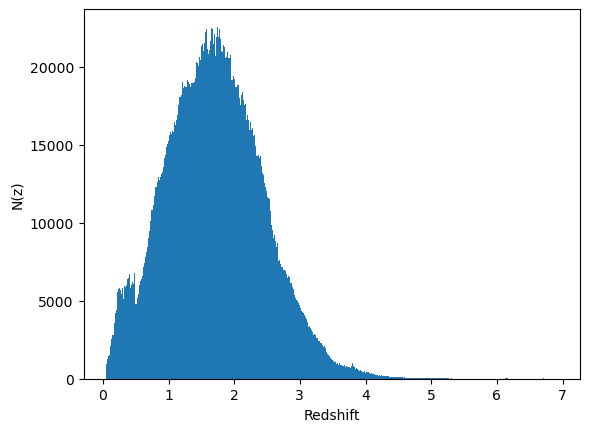

In [31]:
import matplotlib.pyplot as plt
plt.hist(Quasar_cat['Z'], bins = 'auto')
plt.ylabel('N(z)')
plt.xlabel('Redshift')

In [22]:
np.where(Quasar_cat['TARGETID'] == 39627726679704831)

(array([1243314]),)

In [23]:
Quasar_cat[1243314]

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,FITMETHOD,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,DESINAME,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_PSF_TO_FIBER_SPECFLUX,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MIN_MJD,MAX_MJD,MEAN_MJD,TSNR2_BGS_B,TSNR2_ELG_B,TSNR2_GPBBACKUP_B,TSNR2_GPBBRIGHT_B,TSNR2_GPBDARK_B,TSNR2_LRG_B,TSNR2_LYA_B,TSNR2_QSO_B,TSNR2_BGS_R,TSNR2_ELG_R,TSNR2_GPBBACKUP_R,TSNR2_GPBBRIGHT_R,TSNR2_GPBDARK_R,TSNR2_LRG_R,TSNR2_LYA_R,TSNR2_QSO_R,TSNR2_BGS_Z,TSNR2_ELG_Z,TSNR2_GPBBACKUP_Z,TSNR2_GPBBRIGHT_Z,TSNR2_GPBDARK_Z,TSNR2_LRG_Z,TSNR2_LYA_Z,TSNR2_QSO_Z,TSNR2_BGS,TSNR2_ELG,TSNR2_GPBBACKUP,TSNR2_GPBBRIGHT,TSNR2_GPBDARK,TSNR2_LRG,TSNR2_LYA,TSNR2_QSO,MAIN_NSPEC,MAIN_PRIMARY,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY
,,,,,,,,,,,,,,,,,deg,deg,,mas / yr,mas / yr,yr,,,,,,,,,,,mag,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy^-2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,,,arcsec,,,,,mag,mag,mag,mas,,,,,,,,,,,,,,,,,,,,,deg,deg,,s,,,mm,mm,mm,mm,,deg,arcsec,deg,arcsec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],bytes4,int64,bytes6,bytes20,int64,float64,int32,float64,float64,bytes22,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float32,float64,float32,float64,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool,int16,bool,int16,bool
39627726679704831,main,dark,27273,27273,0.6578481817795895,0.00011303067701879604,0,9385.70510929823,1.1880445468461285 .. 0.0,PCA,7847,QSO,LOZ,4,697.5895595308393,0,140.05280015065787,-2.3751356466114126,DESI J140.0528-02.3751,0.0,0.0,2015.5,5764607523034300417,1,TGT,0.9585910589583223,575,9010,1401m025,316528,1279,DEV,0.043053903,5.231595,9.760905,25.758905,107.21346,98.219666,251.45926,85.231445,20.006222,1.5592492,0.4490723,2.059646,3.8428063,10.141117,2.059646,3.8428063,10.141117,0,4.0,0.8398982,0.07804689,0.099555485,0,N/,0.0,0.0,0.0,0.0,S,3200,2,0,5764607523034300417,65537,0,131072,0,0,0,0,0,0,0,0,0,0,0,0,140.05280015065787,-2.3751356466114126,1,1122.9893,1,1,0.008,0.008,0.004,0.004,0.7580243,140.05283250095374,0.0,-2.375151695291228,0.0,59531.49211404,59531.49211404,59531.49211404,660.1361,0.12990269,297.33908,41.735035,237.71149,1.3073786,97.98926,3.5189297,2483.3718,30.01055,14211.778,2171.5457,12828.842,42.266422,0.044847522,9.064916,4397.585,110.65594,2.6870033e-05,3.732772e-06,2.123119

In [24]:
import os
import numpy as np

import fitsio

from astropy.io import fits
from astropy.table import Table, vstack, join
from astropy.convolution import convolve, Gaussian1DKernel

import matplotlib
import matplotlib.pyplot as plt

#-- input/output functions related to DESI spectra
import desispec.io


def get_spec_data(tid, survey=None, program=None):
    #-- the index of the specific target can be uniquely determined with the combination of TARGETID, SURVEY, and PROGRAM
    idx = np.where( (Quasar_cat["TARGETID"]==tid) & (Quasar_cat["SURVEY"]==survey) & (Quasar_cat["PROGRAM"]==program) )[0][0]

    #-- healpix values are integers but are converted here into a string for easier access to the file path
    hpx = Quasar_cat["HEALPIX"].astype(str)

    specprod_dir = f"/global/cfs/cdirs/desi/spectro/redux/kibo/"
    target_dir   = f"{specprod_dir}/healpix/{survey}/{program}/{hpx[idx][:-2]}/{hpx[idx]}"
    coadd_fname  = f"coadd-{survey}-{program}-{hpx[idx]}.fits"

    #-- read in the spectra with desispec
    coadd_obj  = desispec.io.read_spectra(f"{target_dir}/{coadd_fname}")
    coadd_tgts = coadd_obj.target_ids().data

    #-- select the spectrum of  targetid
    row = ( coadd_tgts==Quasar_cat["TARGETID"][idx] )
    coadd_spec = coadd_obj[row]

    return coadd_spec

In [19]:
import os
import numpy as np

import fitsio

from astropy.io import fits
from astropy.table import Table, vstack, join
from astropy.convolution import convolve, Gaussian1DKernel

import matplotlib
import matplotlib.pyplot as plt

#-- input/output functions related to DESI spectra
import desispec.io


def get_spec_data(tid, survey=None, program=None):
    #-- the index of the specific target can be uniquely determined with the combination of TARGETID, SURVEY, and PROGRAM
    idx = np.where( (Quasar_cat["TARGETID"]==tid) & (Quasar_cat["SURVEY"]==survey) & (Quasar_cat["PROGRAM"]==program) )[0][0]

    #-- healpix values are integers but are converted here into a string for easier access to the file path
    hpx = Quasar_cat["HEALPIX"].astype(str)

    specprod = "dr1"

    specprod_dir = f"/global/cfs/cdirs/desi/public/dr1/spectro/redux/iron"
    target_dir   = f"{specprod_dir}/healpix/{survey}/{program}/{hpx[idx][:-2]}/{hpx[idx]}"
    coadd_fname  = f"coadd-{survey}-{program}-{hpx[idx]}.fits"

    #-- read in the spectra with desispec
    coadd_obj  = desispec.io.read_spectra(f"{target_dir}/{coadd_fname}")
    coadd_tgts = coadd_obj.target_ids().data

    #-- select the spectrum of  targetid
    row = ( coadd_tgts==Quasar_cat["TARGETID"][idx] )
    coadd_spec = coadd_obj[row]

    return coadd_spec

In [26]:
spec = get_spec_data(39627726679704831, 'main', 'dark')

INFO:spectra.py:391:read_spectra: iotime 1.970 sec to read coadd-main-dark-27273.fits at 2024-09-16T08:49:04.681917


In [27]:
import matplotlib.pyplot as plt

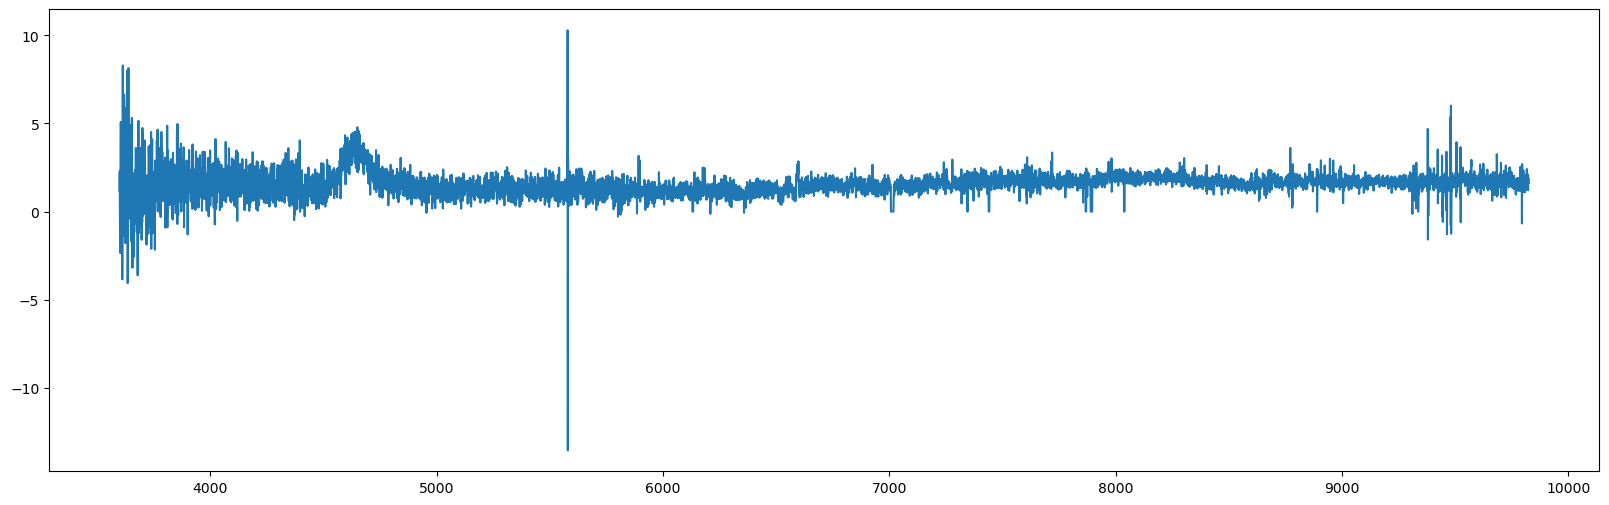

In [28]:
from desispec import coaddition

spec = coaddition.coadd_cameras(spec)
plt.figure(figsize = (20,6))
plt.plot(spec.wave['brz'], spec.flux['brz'][0])

In [26]:
np.save('Can_flux.npy', spec.flux['brz'][0])